In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt # data visualization

In [2]:
df = pd.read_csv("/home/msjahid/Documents/marketing-data-explorer/data/marketing_data.csv")

In [3]:
class Plotter:
    @staticmethod
    def format_func(value, tick_number):
        if int(value) == value:  # Check if the value is an integer
            return f'{int(value)}'
        else:
            return f'{round(value, 2)}'

    @staticmethod
    def plot_kde_histogram(df, columns, columns_per_row=3):
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
    
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_cols:  # Ensure not to exceed the number of columns
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.kdeplot(data=df[col], color=palette[i], fill=True, ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(f'KDE - {title}', color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 90 degrees for better readability
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skew = df[col].skew()
                custom_text = '\n'.join((
                    r'$\mu=%.2f$' % df[col].mean(),
                    r'$\sigma=%.2f$' % df[col].std(),
                    rf'$\gamma=%.2f$' % skew  # Include skewness with the gamma symbol
                ))
                axs[i].text(0.83, 0.95, custom_text, transform=axs[i].transAxes, fontsize=11, verticalalignment='top',
                            color=palette[i], bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='gray', pad=0.5))

                # Set custom formatter for x-axis ticks to display integers or floating point numbers
                # axs[i].xaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 
                # axs[i].yaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 

        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_cols, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

        # Show plot
        plt.show()

    @staticmethod
    def plot_hist_histogram(df, columns, columns_per_row=3):
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
        
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Calculate the actual number of subplots needed based on the number of columns
        num_plots = min(num_cols, columns_per_row * num_rows)

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_plots:  # Ensure not to exceed the number of subplots needed
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.histplot(data=df, x=col, color=palette[i], kde=True, bins=round(np.sqrt(len(df))), ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(title, color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 45 degrees
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skew = df[col].skew()
                custom_text = '\n'.join((
                    r'$\mu=%.2f$' % df[col].mean(),
                    r'$\sigma=%.2f$' % df[col].std(),
                    rf'$\gamma=%.2f$' % skew  # Include skewness with the gamma symbol
                ))
                axs[i].text(0.83, 0.95, custom_text, transform=axs[i].transAxes, fontsize=11, verticalalignment='top',
                            color=palette[i], bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='gray', pad=0.5))

        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_plots, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

        # Show plot
        plt.show()

/tmp/ipykernel_159629/242037687.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
/tmp/ipykernel_159629/242037687.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
/tmp/ipykernel_159629/242037687.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
/tmp/ipykernel_159629/242037687.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
/tmp/ipykernel_159629/242037687.py:106: UserWarning: set_ticklabels() should

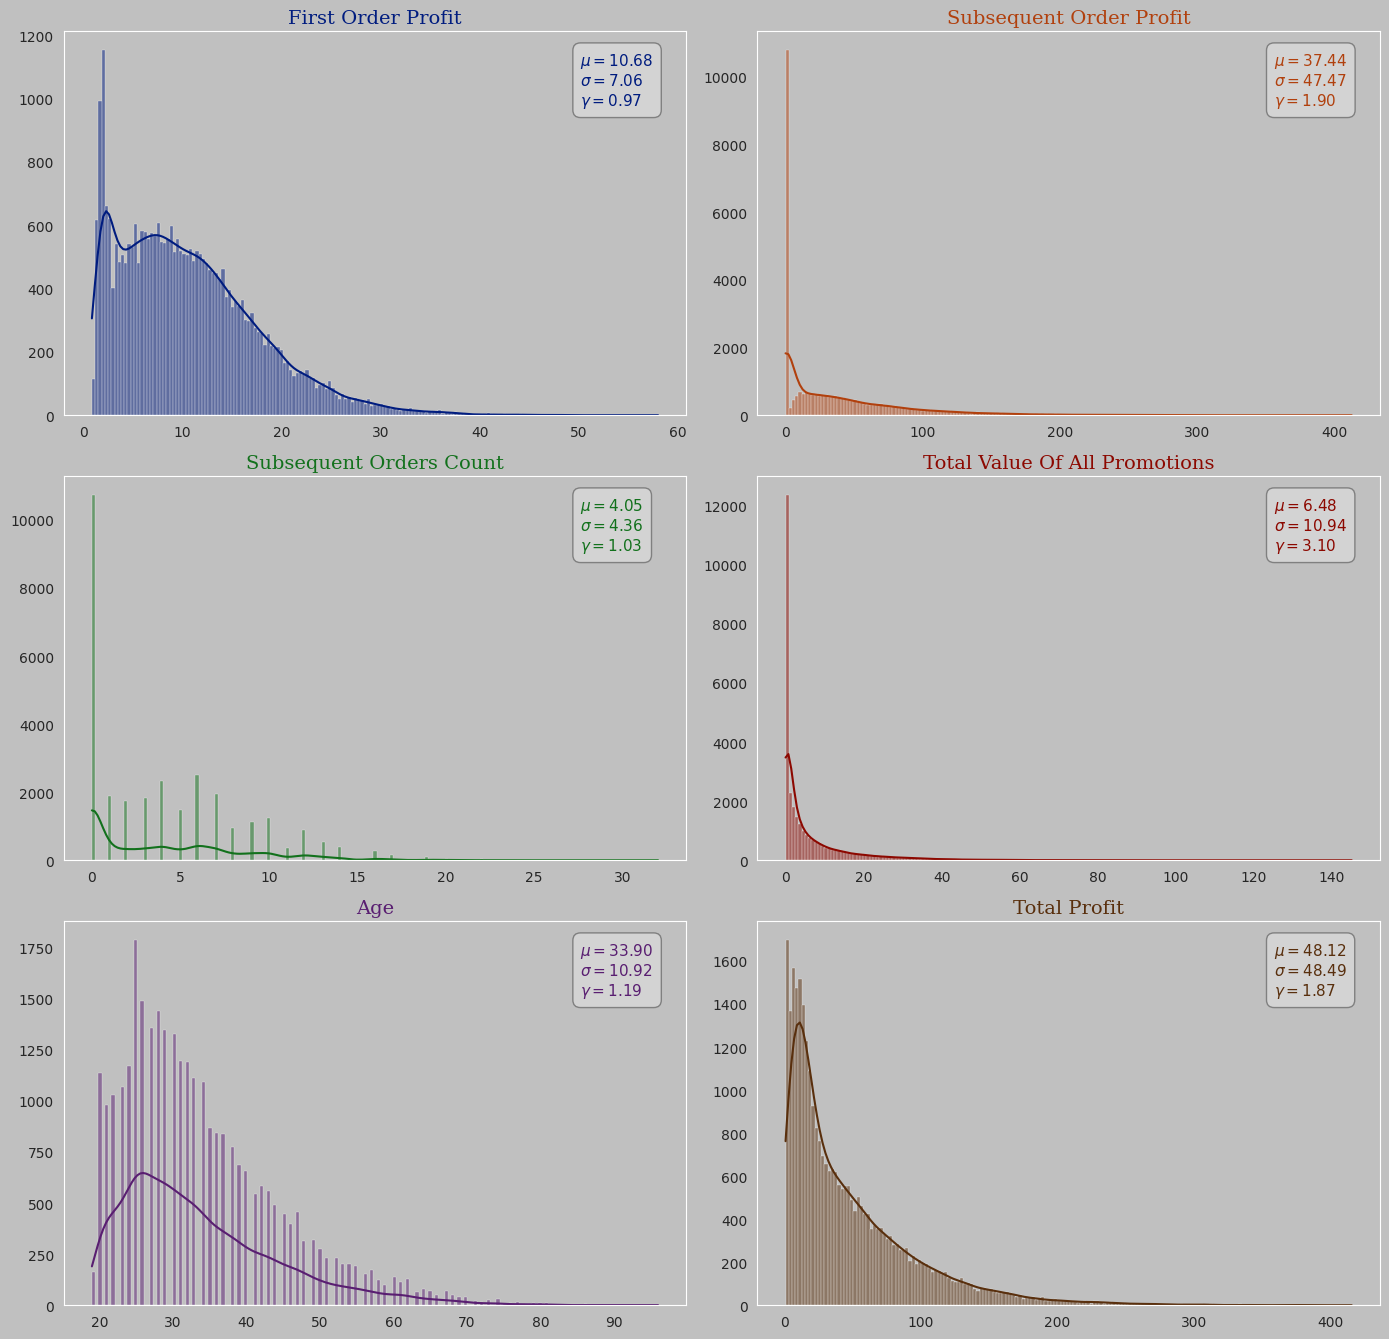

In [4]:
columns = ["First_Order_Profit", "Subsequent_Order_Profit", "Subsequent_Orders_Count",
  "Total_value_of_all_promotions", "Age", "Total_Profit"]
Plotter.plot_hist_histogram(df, columns, columns_per_row=2)

In [5]:
df.columns

Index(['Customer_ID', 'Gender', 'Date_Of_Birth', 'Location', 'Contact_Allowed',
       'Registration_Date', 'Marketing_Channel_Type', 'First_Order_Profit',
       'Subsequent_Order_Profit', 'Subsequent_Orders_Count',
       'Total_value_of_all_promotions', 'Age', 'Total_Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30591 entries, 0 to 30590
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    30591 non-null  int64  
 1   Gender                         30591 non-null  object 
 2   Date_Of_Birth                  30591 non-null  object 
 3   Location                       30591 non-null  object 
 4   Contact_Allowed                30591 non-null  object 
 5   Registration_Date              30591 non-null  object 
 6   Marketing_Channel_Type         30591 non-null  object 
 7   First_Order_Profit             30591 non-null  float64
 8   Subsequent_Order_Profit        30591 non-null  float64
 9   Subsequent_Orders_Count        30591 non-null  int64  
 10  Total_value_of_all_promotions  30591 non-null  float64
 11  Age                            30591 non-null  int64  
 12  Total_Profit                   30591 non-null 

In [7]:
df['Gender'].value_counts()

Gender
Male           19436
Female          7180
Not Defined     3975
Name: count, dtype: int64

In [8]:
df['Location'].nunique()

50

In [9]:
df['Contact_Allowed'].value_counts()

Contact_Allowed
Y    17648
N    12943
Name: count, dtype: int64

In [10]:
df['Marketing_Channel_Type'].value_counts()

Marketing_Channel_Type
Direct            10941
Organic Search     8164
Paid Search        6354
Affiliates         3756
Paid Social        1376
Name: count, dtype: int64

In [11]:
df.shape

(30591, 13)